#### EDA on Lemmatized COPOM Minutes

Appendix to visualize term frequency and lexical diversity after the text has been preprocessed.
 * It reads the lemmatized text files from the `data/processed/copom_minutes_lemmatized` folder.
 * The script calculates the frequency of the most common words in the lemmatized corpus.
 * It generates several plots, including a bar chart of the most frequent words and a word cloud to visualize their frequency and prominence.

In [19]:
import glob
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
FOLDER_MINUTES_LEMMATIZED = "./data/processed/copom_minutes_lemmatized"
INITIAL_DATE = "2003-06-26"

In [21]:
minutes_info = pd.read_excel("./data/raw/minutes_info.xlsx")
minutes_info['DataReferencia'] = pd.to_datetime(minutes_info['DataReferencia'])
minutes_info = minutes_info[minutes_info["DataReferencia"] >= INITIAL_DATE]

minutes_names = minutes_info["Titulo"].to_list()
filepaths = [f"{FOLDER_MINUTES_LEMMATIZED}/{minute}.txt" for minute in minutes_names]

In [22]:
all_minutes_str = ""
all_minutes_list = []
paragraphs_size = []

for path in filepaths:
    filename = os.path.basename(path)
        
    with open(path, 'r', encoding='utf-8') as f:
        minute = f.read()
        all_minutes_str += minute
        
        paragraphs = [p for p in minute.split('\n') if p.strip()]
        all_minutes_list.append(paragraphs)
        
        for paragrafo in paragraphs: 
            palavras = [w for w in paragrafo.split(' ')]
            paragraphs_size.append(len(palavras))


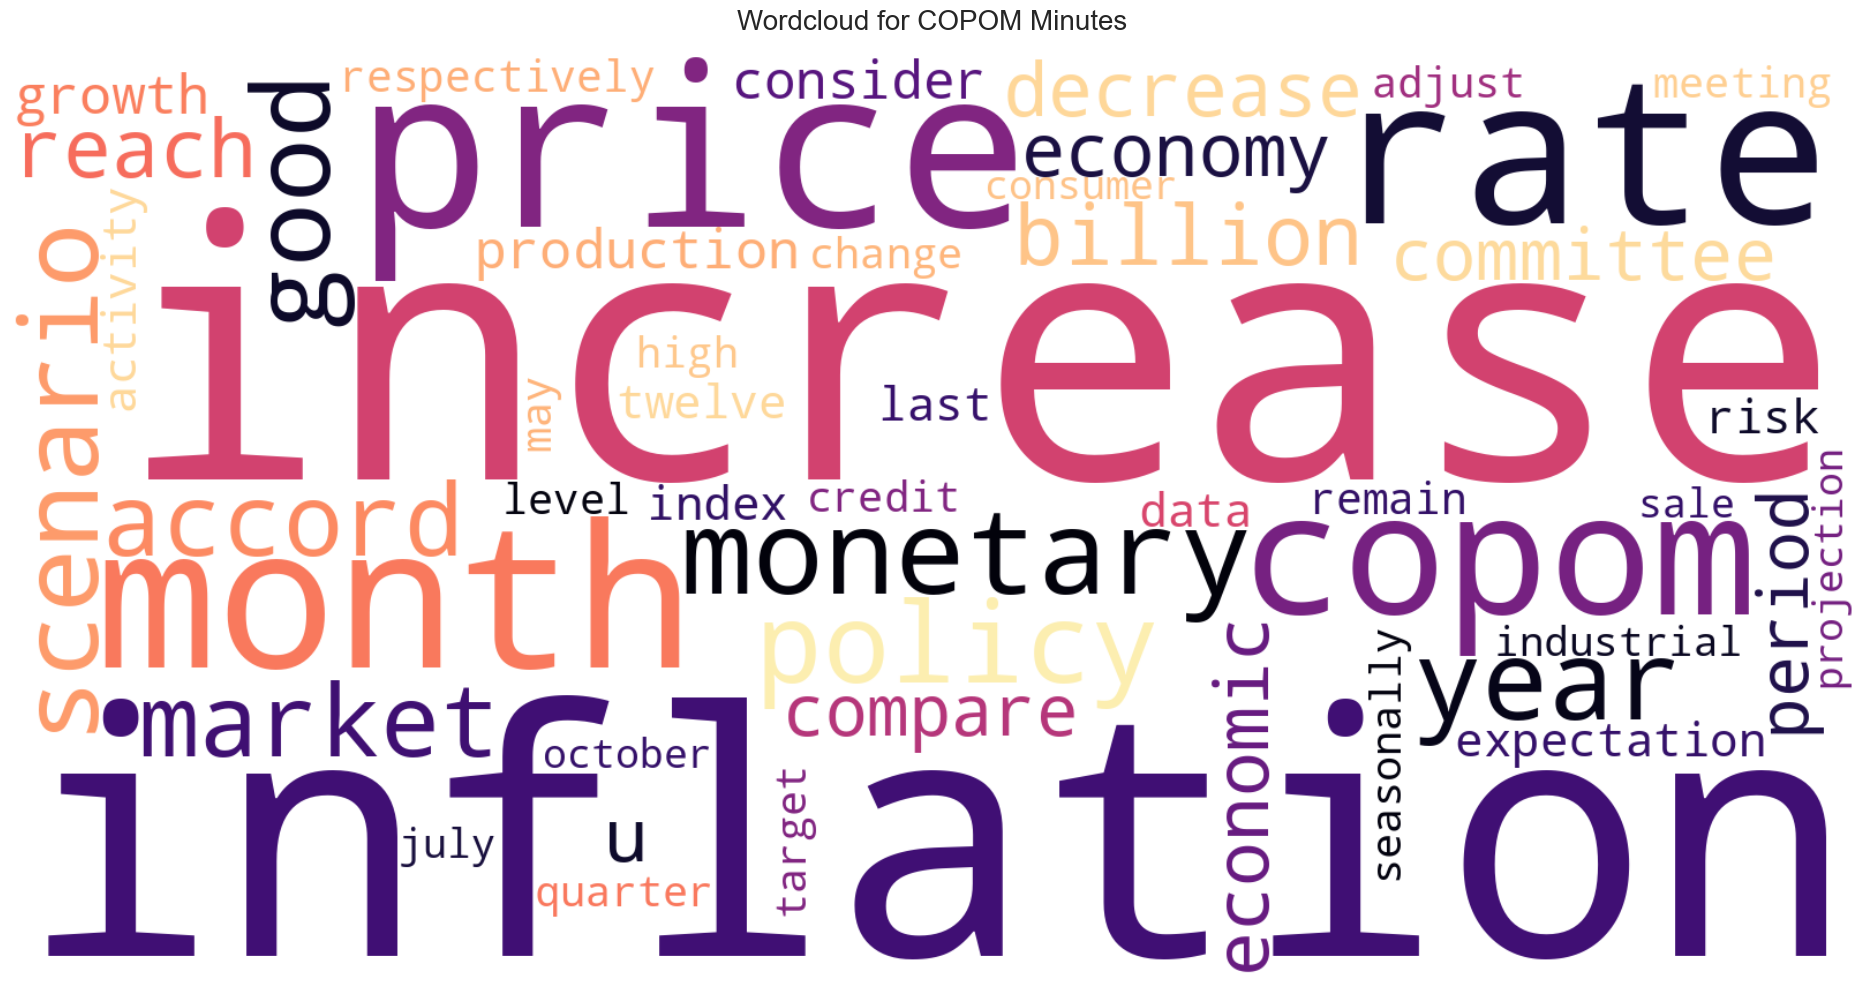

In [23]:
wordcloud = WordCloud(
    background_color="white",
    width=1600,
    height=800,
    max_words=50,
    colormap='magma',
    collocations=False
).generate(all_minutes_str)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Wordcloud for COPOM Minutes', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

plt.close()

C:\Users\MatheusBreitenbach\AppData\Local\Temp\ipykernel_23272\1009384802.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


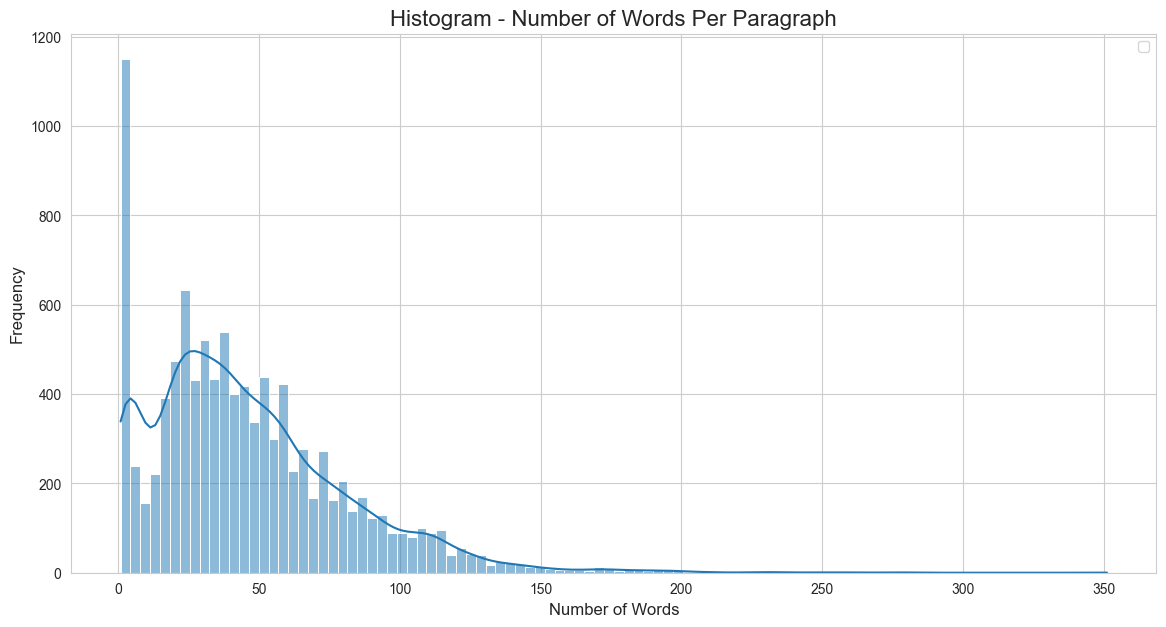

In [24]:
plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.histplot(data=paragraphs_size, bins=100, kde=True)

plt.title('Histogram - Number of Words Per Paragraph', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

C:\Users\MatheusBreitenbach\AppData\Local\Temp\ipykernel_23272\2581050201.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


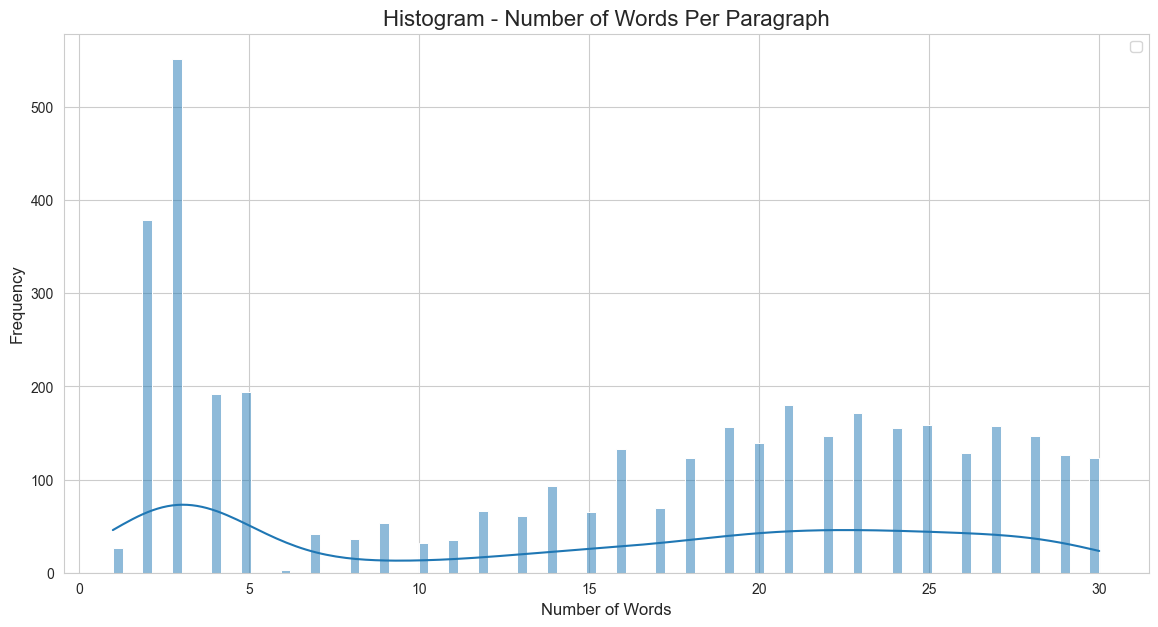

In [25]:
# Which paragraph size to ignore? It seams to be the ones smaller than 6 words.

n_words_max = 30
paragraphs_size_less15 = [p_size for p_size in paragraphs_size if p_size <= n_words_max]
bins = np.arange(0, n_words_max+1) - 0.5

plt.figure(figsize=(14, 7))
sns.set_style("whitegrid")

sns.histplot(data=paragraphs_size_less15, bins=100, kde=True)

plt.title('Histogram - Number of Words Per Paragraph', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()